In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [6]:
df.shape

(22, 3)

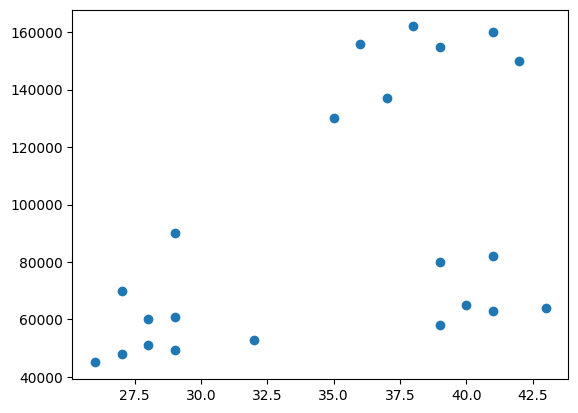

In [7]:
plt.scatter(df["Age"],df["Income($)"])

In [20]:
df.drop(["Name"],axis=1,inplace=True)

In [21]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [34]:
x=df.iloc[:,0:].values
x

array([[    27,  70000],
       [    29,  90000],
       [    29,  61000],
       [    28,  60000],
       [    42, 150000],
       [    39, 155000],
       [    41, 160000],
       [    38, 162000],
       [    36, 156000],
       [    35, 130000],
       [    37, 137000],
       [    26,  45000],
       [    27,  48000],
       [    28,  51000],
       [    29,  49500],
       [    32,  53000],
       [    40,  65000],
       [    41,  63000],
       [    43,  64000],
       [    39,  80000],
       [    41,  82000],
       [    39,  58000]])

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [8]:
from sklearn.cluster import KMeans

In [37]:
dis=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x)
    dis.append(km.inertia_)

In [38]:
dis

[43.99999999999999,
 16.19489027470677,
 3.889308657130142,
 2.9212906954071745,
 2.3216926822180213,
 1.8074518530059418,
 1.5323148374098898,
 1.2197109230354537,
 0.8830271764956257,
 0.7199412180832795]

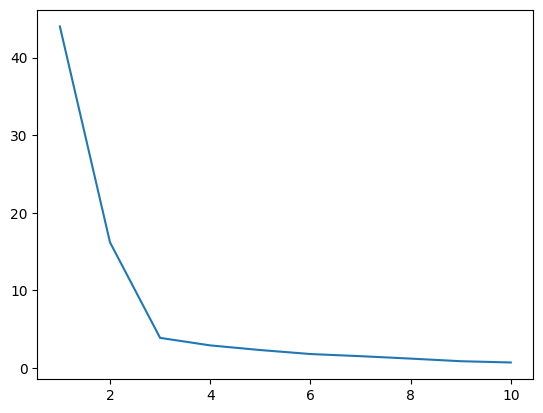

In [39]:
plt.plot(range(1,11),dis)

In [40]:
kmeans=KMeans(n_clusters=3,random_state=0)

In [41]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [42]:
prd=kmeans.predict(x)
prd

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [43]:
plt.scatter(prd)

TypeError: scatter() missing 1 required positional argument: 'y'

In [60]:
center=kmeans.cluster_centers_
center

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

In [61]:
df['class']=prd

In [62]:
df

,Age,Income($),class
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


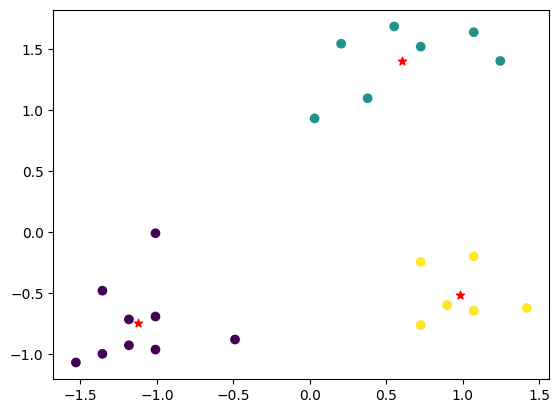

In [63]:
plt.scatter(x[:,0],x[:,1],c=prd)
plt.scatter(center[:,0],center[:,1],marker="*",color="r")

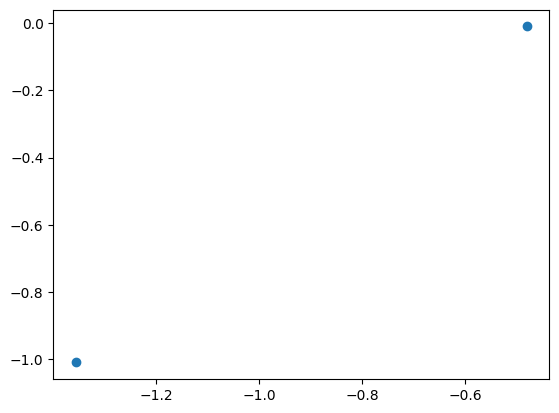

In [50]:
plt.scatter(x[0],x[1])

In [51]:
df1=df[df["class"]=0]
df2=df[df["class"]=1]
df3=df[df["class"]=2]
plt.scatter(df1["Age"],df1["class"])
plt.scatter(df2["Age"],df2["class"])
plt.scatter(df3["Age"],df3["class"])



SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1476352886.py, line 1)